<div style="float:right;"><ul><li><b>Name:</b>Yash Ketan Kanakia</li><li><b>Roll No: </b>E21027</li></ul></div>

## Linear Discriminant Analysis

#### Overview

- Linear Discriminant Analysis or LDA is a dimensionality reduction technique. It is used as a pre-processing step in Machine Learning and applications of pattern classification. The goal of LDA is to project the features in higher dimensional space onto a lower-dimensional space in order to avoid the curse of dimensionality and also reduce resources and dimensional costs.

#### What is Dimensionality Reduction?

- The techniques of dimensionality reduction are important in applications of Machine Learning, Data Mining, Bioinformatics, and Information Retrieval. The main agenda is to remove the redundant and dependent features by changing the dataset onto a lower-dimensional space.

- In simple terms, they reduce the dimensions (i.e. variables) in a particular dataset while retaining most of the data.

#### What are the limitations of Logistic Regression?

- Logistic Regression is a simple and powerful linear classification algorithm. However, it has some disadvantages;
    - Two-class problems – Logistic Regression is traditionally used for two-class and binary classification problems. It does not perform well in multiclass problems.

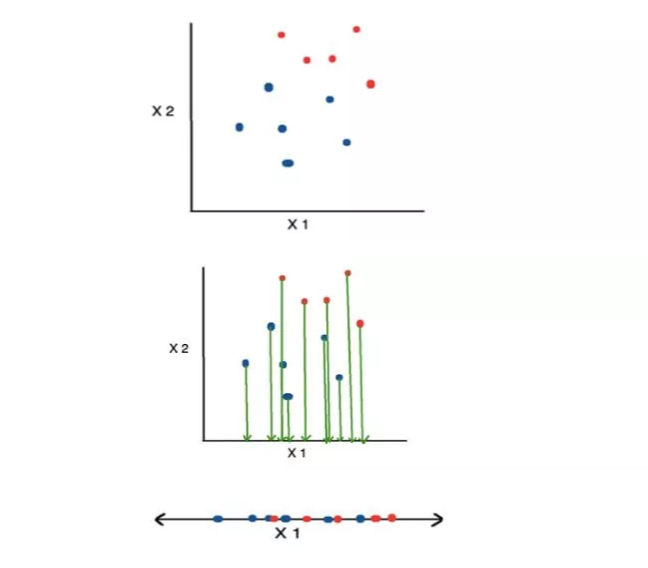

- This approach neglects any helpful information provided by the second feature. However, you can use LDA to plot it. The advantage of LDA is that it uses information from both the features to create a new axis which in turn minimizes the variance and maximizes the class distance of the two variables.

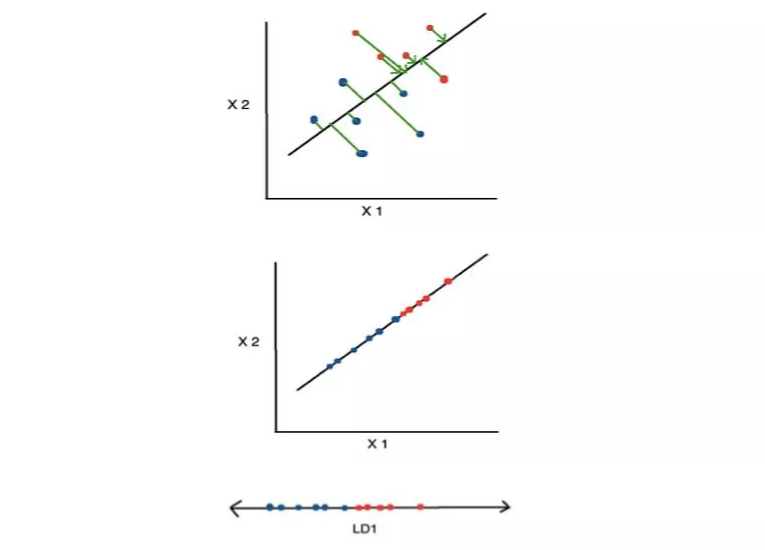

#### Assumptions of LDA


1. Each feature (variable or dimension or attribute) in the dataset is a gaussian distribution. In other words, each feature in the dataset is shaped like a bell-shaped curve.
2. Each feature has the same variance, the value of each feature varies around the mean with the same amount on average.

3. Each feature is assumed to be randomly sampled.

4. Lack of multicollinearity in independent features. Increase in correlations between independent features and the power of prediction decreases.

### Importing required libraries in our Jupyter notebook

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# This is to supress the warning messages
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv(r"C:\Users\Owner\Downloads\Statistics\CPSData.csv")
df = df.dropna().reset_index(drop=True)

In [27]:
df.head()

,PeopleInHousehold,Region,State,MetroAreaCode,Age,Married,Sex,Education,Race,Hispanic,CountryOfBirthCode,Citizenship,EmploymentStatus,Industry
0,3,South,Alabama,13820.0,21,Never Married,Male,High school,Black,0,57,"Citizen, Native",Unemployed,Professional and business services
1,3,South,Alabama,26620.0,52,Widowed,Female,Associate degree,White,0,57,"Citizen, Native",Employed,Professional and business services
2,3,South,Alabama,26620.0,24,Never Married,Male,Bachelor's degree,White,0,57,"Citizen, Native",Employed,Educational and health services
3,3,South,Alabama,26620.0,26,Never Married,Male,High school,White,0,57,"Citizen, Native",Employed,Transportation and utilities
4,2,South,Alabama,33660.0,71,Divorced,Female,High school,White,0,57,"Citizen, Native",Employed,Educational and health services


In [28]:
df['Sex'].replace(['Male','Female'],[0,1],inplace=True)

In [29]:
#Analysis of Numerical Columns
num_df = df.select_dtypes(exclude = 'object').copy()
num_df.head()

,PeopleInHousehold,MetroAreaCode,Age,Sex,Hispanic,CountryOfBirthCode
0,3,13820.0,21,0,0,57
1,3,26620.0,52,1,0,57
2,3,26620.0,24,0,0,57
3,3,26620.0,26,0,0,57
4,2,33660.0,71,1,0,57


In [31]:
num_df['Married'] = df['Married']
dataframe = num_df
dataframe.head()

,PeopleInHousehold,MetroAreaCode,Age,Sex,Hispanic,CountryOfBirthCode,Married
0,3,13820.0,21,0,0,57,Never Married
1,3,26620.0,52,1,0,57,Widowed
2,3,26620.0,24,0,0,57,Never Married
3,3,26620.0,26,0,0,57,Never Married
4,2,33660.0,71,1,0,57,Divorced


### Checking Correlation

In [32]:
dataframe.corr()

,PeopleInHousehold,MetroAreaCode,Age,Sex,Hispanic,CountryOfBirthCode
PeopleInHousehold,1.000000,-0.000322,-0.231611,-0.032124,0.175195,0.154700
MetroAreaCode,-0.000322,1.000000,0.024995,0.010878,-0.040089,0.006733
Age,-0.231611,0.024995,1.000000,-0.008327,-0.121425,-0.002127
Sex,-0.032124,0.010878,-0.008327,1.000000,-0.024544,-0.029582
Hispanic,0.175195,-0.040089,-0.121425,-0.024544,1.000000,0.424328
CountryOfBirthCode,0.154700,0.006733,-0.002127,-0.029582,0.424328,1.000000


### Checking Outliers

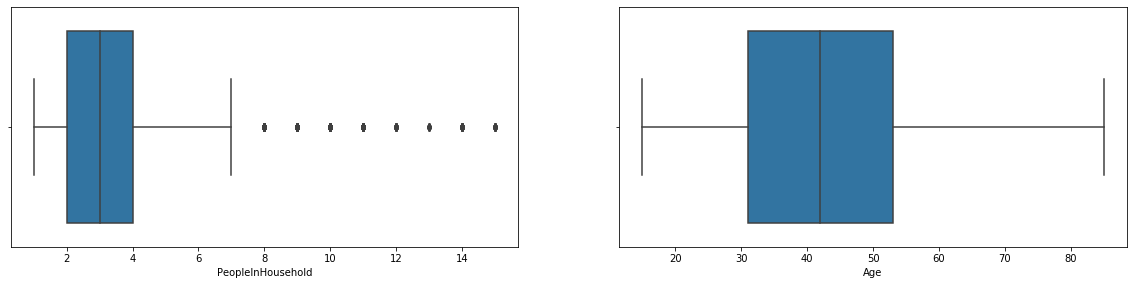

In [33]:
fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(3,2,1) 
sns.boxplot(x="PeopleInHousehold", data=dataframe,ax = ax1)

ax1 = fig.add_subplot(3,2,2) 
sns.boxplot(x="Age", data=dataframe,ax = ax1)

plt.show()

### create feature vector for every class and store it in a variable named “between_class_feature_means”

In [34]:
class_feature_means = pd.DataFrame(columns=dataframe.Married.unique())
for c, rows in dataframe.groupby('Married'):
    class_feature_means[c] = rows.mean()
class_feature_means

,Never Married,Widowed,Divorced,Married,Separated
PeopleInHousehold,2.935058,2.026461,2.254643,3.380308,2.808571
MetroAreaCode,35597.836378,35305.424476,34776.110698,35429.943453,34112.142857
Age,31.364115,60.091510,49.454866,46.605536,43.346667
Sex,0.474197,0.771775,0.585067,0.452415,0.547619
Hispanic,0.167422,0.101433,0.115527,0.132572,0.281905
CountryOfBirthCode,87.097680,93.291069,86.212667,101.018812,122.491429


### Independent and Dependent Split

In [35]:
#Adding Output Column in x and then removing for Train(X) and y='Output'

X = dataframe.drop('Married', axis=1) # input categorical features
y = dataframe['Married'] # target variable

### Checking Shape of Independent Variable

In [36]:
X.shape

(49396, 6)

### plug the mean mu  into the “between_class_feature_means” to get  within the class scatter matrix.  

In [37]:
within_class_scatter_matrix = np.zeros((6,6))
for c, rows in dataframe.groupby('Married'):
    rows = rows.drop(['Married'], axis=1)
    s = np.zeros((6,6))
for index, row in rows.iterrows():
        x, mc = row.values.reshape(6,1), class_feature_means[c].values.reshape(6,1)
        s += (x - mc).dot((x - mc).T)
    
within_class_scatter_matrix += s

In [38]:
feature_means = dataframe.mean()
between_class_scatter_matrix = np.zeros((6,6))
for c in class_feature_means:    
    n = len(dataframe.loc[dataframe['Married'] == c].index)
    
    mc, m = class_feature_means[c].values.reshape(6,1), feature_means.values.reshape(6,1)
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)

### Eigen Values and Eigen Vectors

In [39]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

### The eigenvalue maps to the same eigenvector after sorting, we place them in a temporary array

In [40]:
pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)
for pair in pairs:
    print(pair[0])

24.29149363414445
5.16252592155207
0.3155824835923976
0.06621786667470474
1.8851537295758788e-15
4.655033677211058e-16


### Percentage Variance

In [41]:
eigen_value_sums = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/eigen_value_sums).real))

Explained Variance
Eigenvector 0: 0.8141721498087281
Eigenvector 1: 0.17303113967785336
Eigenvector 2: 0.010577302202086242
Eigenvector 3: 0.002219408311332145
Eigenvector 4: 6.318424415744216e-17
Eigenvector 5: 1.5602164418081246e-17


## LDA Tranformation

In [42]:
w_matrix = np.hstack((pairs[0][1].reshape(6,1), pairs[1][1].reshape(6,1))).real

In [43]:
X_lda = np.array(X.dot(w_matrix))

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(dataframe['Married'])

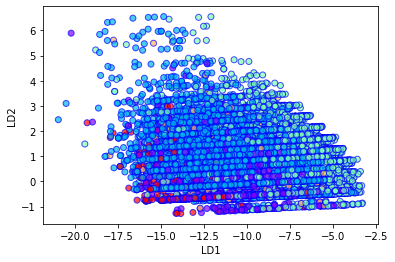

In [45]:
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

In [64]:
lda.explained_variance_ratio_

array([0.84840629, 0.14145522])

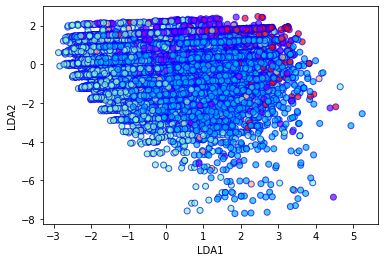

In [65]:
plt.xlabel('LDA1')
plt.ylabel('LDA2')
plt.scatter(
X_lda[:,0],
X_lda[:,1],
   c=y,
cmap='rainbow',
   alpha=0.7,
edgecolors='b'
)

### Train and Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score,plot_roc_curve

### Logistic Regression
(for compraison)

In [68]:
#Logistic Regression Model Fitting
log_model = LogisticRegression(max_iter=10,multi_class='multinomial')
log_model.fit(X_train, y_train)

log_pred = log_model.predict(X_test)

print("Classification Report: \n",classification_report(y_test, log_pred))
print("\n Confusion Matrix: \n",confusion_matrix(y_test, log_pred))
print("\n Accuracy Score: ",round(accuracy_score(y_test, log_pred),2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1638
           1       0.54      1.00      0.71      8076
           2       0.00      0.00      0.00      4494
           3       0.00      0.00      0.00       343
           4       0.00      0.00      0.00       268

    accuracy                           0.54     14819
   macro avg       0.11      0.20      0.14     14819
weighted avg       0.30      0.54      0.38     14819


 Confusion Matrix: 
 [[   0 1638    0    0    0]
 [   0 8076    0    0    0]
 [   0 4494    0    0    0]
 [   0  343    0    0    0]
 [   0  268    0    0    0]]

 Accuracy Score:  0.54


### LDA Transformation for Logistic Regression

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [70]:
# LR after LDA transformation

classifier_lda = LogisticRegression(random_state=1)
classifier_lda.fit(X_train_lda, y_train)

LogisticRegression(random_state=1)

In [71]:
# Predictions of LDA data

y_pred_lda = classifier_lda.predict(X_test_lda)

In [72]:
print("Classification Report: \n",classification_report(y_test, y_pred_lda))
print("\n Confusion Matrix: \n",confusion_matrix(y_test, y_pred_lda))
print("\n Accuracy Score: ",round(accuracy_score(y_test, y_pred_lda),2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.42      0.00      0.01      1638
           1       0.68      0.86      0.76      8076
           2       0.68      0.68      0.68      4494
           3       0.00      0.00      0.00       343
           4       0.71      0.02      0.04       268

    accuracy                           0.68     14819
   macro avg       0.50      0.31      0.30     14819
weighted avg       0.64      0.68      0.62     14819


 Confusion Matrix: 
 [[   8 1404  225    0    1]
 [   2 6983 1090    0    1]
 [   4 1439 3051    0    0]
 [   1  262   80    0    0]
 [   4  248   11    0    5]]

 Accuracy Score:  0.68


In [73]:
# Evaluation with Confusion matrix

# original / After LDA 
print('Original & LDA')
cm4 = confusion_matrix(log_pred, y_pred_lda)
print(cm4)
print('          ')

# actual / result without LDA
print('actual / without LDA')
cm5 = confusion_matrix(y_test, log_pred)
print(cm5)
print('          ')

# actual / result with LDA
print('actual / with LDA')
cm6 = confusion_matrix(y_test, y_pred_lda)
print(cm6)

Original & LDA
[[    0     0     0     0]
 [   19 10336  4457     7]
 [    0     0     0     0]
 [    0     0     0     0]]
          
actual / without LDA
[[   0 1638    0    0    0]
 [   0 8076    0    0    0]
 [   0 4494    0    0    0]
 [   0  343    0    0    0]
 [   0  268    0    0    0]]
          
actual / with LDA
[[   8 1404  225    0    1]
 [   2 6983 1090    0    1]
 [   4 1439 3051    0    0]
 [   1  262   80    0    0]
 [   4  248   11    0    5]]
